In [1]:
import pandas as pd

ads = pd.read_csv("../Data/Social_Network_Ads.csv")

ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<Axes: xlabel='Purchased', ylabel='EstimatedSalary'>

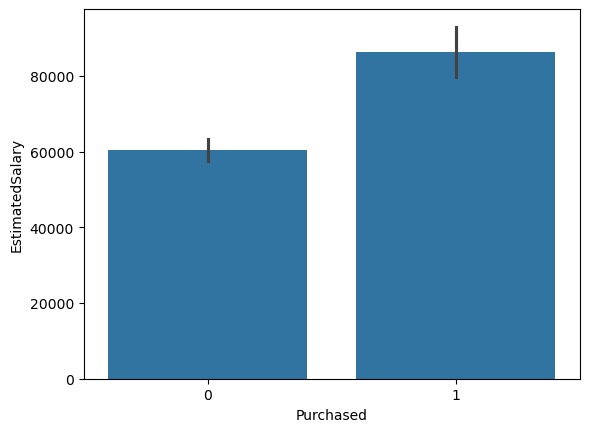

In [2]:
import seaborn as sns

sns.barplot(data=ads, x="Purchased", y="EstimatedSalary")

In [3]:
ads.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(ads[["Gender", "Age","EstimatedSalary"]], drop_first=True)
y = ads["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression() 

lr = logreg.fit(X_train, y_train)

In [6]:
print(f"Coefficients: {lr.coef_}") 
print(f"Intercept: {lr.intercept_}") 

Coefficients: [[-5.82819478e-03 -5.92319067e-07 -7.15206560e-04]]
Intercept: [-0.00127207]


In [7]:
lr.predict_proba(X_test)

array([[0.58183365, 0.41816635],
       [0.58210008, 0.41789992],
       [0.56720002, 0.43279998],
       [0.54962391, 0.45037609],
       [0.59154853, 0.40845147],
       [0.57896088, 0.42103912],
       [0.54065938, 0.45934062],
       [0.57373251, 0.42626749],
       [0.5434932 , 0.4565068 ],
       [0.57097792, 0.42902208],
       [0.5694332 , 0.4305668 ],
       [0.5708383 , 0.4291617 ],
       [0.54964189, 0.45035811],
       [0.57786261, 0.42213739],
       [0.54748733, 0.45251267],
       [0.58404126, 0.41595874],
       [0.58634583, 0.41365417],
       [0.58873456, 0.41126544],
       [0.59304227, 0.40695773],
       [0.56543236, 0.43456764],
       [0.57478036, 0.42521964],
       [0.54590312, 0.45409688],
       [0.55703607, 0.44296393],
       [0.58384442, 0.41615558],
       [0.56894404, 0.43105596],
       [0.56622993, 0.43377007],
       [0.56986882, 0.43013118],
       [0.59631924, 0.40368076],
       [0.58446611, 0.41553389],
       [0.555821  , 0.444179  ],
       [0.

In [8]:
lr.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
lr.intercept_

array([-0.00127207])

In [10]:
[f"{x}: {y}" for x,y in zip(list(X_train.columns), lr.coef_[0])]

['Age: -0.0058281947825229745',
 'EstimatedSalary: -5.923190666157496e-07',
 'Gender_Male: -0.0007152065604118977']

In [11]:
print(f"Train Accuracy: {lr.score(X_train, y_train)}")
print(f"Test Accuracy: {lr.score(X_test, y_test)}")

Train Accuracy: 0.653125
Test Accuracy: 0.6


In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(X_test))

array([[48,  0],
       [32,  0]])

In [13]:
from sklearn.metrics import precision_score, recall_score

recall_score(y_test, lr.predict(X_test))

0.0

In [14]:
list(X_train.columns)

['Age', 'EstimatedSalary', 'Gender_Male']

In [15]:
pd.DataFrame({
    "Feature": X_train.columns, 
    "Coefficient": lr.coef_[0]
})

,Feature,Coefficient
0,Age,-5.828195e-03
1,EstimatedSalary,-5.923191e-07
2,Gender_Male,-7.152066e-04


In [16]:
lr.coef_

array([[-5.82819478e-03, -5.92319067e-07, -7.15206560e-04]])

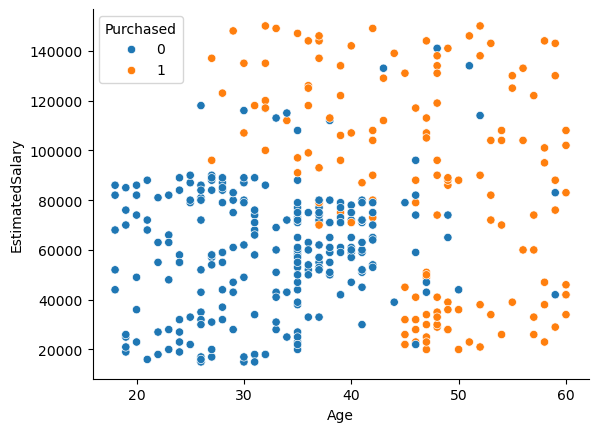

In [17]:
sns.scatterplot(ads, x="Age", y="EstimatedSalary", hue="Purchased");

sns.despine()

In [19]:
import numpy as np

ads = pd.get_dummies(
    ads.assign(
        age45 = np.where(ads["Age"] > 45, 1, 0),
        salary90 = np.where(ads["EstimatedSalary"] > 90000, 1, 0),
        agexsal = ads["Age"] * ads["EstimatedSalary"]
    ), 
    drop_first=True
)    

ads.head()

,User ID,Age,EstimatedSalary,Purchased,age45,salary90,agexsal,Gender_Male
0,15624510,19,19000,0,0,0,361000,True
1,15810944,35,20000,0,0,0,700000,True
2,15668575,26,43000,0,0,0,1118000,False
3,15603246,27,57000,0,0,0,1539000,False
4,15804002,19,76000,0,0,0,1444000,True


In [21]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(ads[["age45", "salary90"]], drop_first=True)
y = ads["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

print(
    f"Training Set Rows: {X.shape[0]}",
    f"Test Set Rows: {X_test.shape[0]}"
)

Training Set Rows: 400 Test Set Rows: 80


In [23]:
ads = pd.read_csv("../Data/Social_Network_Ads.csv")

X = pd.get_dummies(ads[["Gender", "Age","EstimatedSalary"]], drop_first=True)
y = ads["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [24]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [25]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "C": np.linspace(.1, 2, 20),
    "penalty": ["l1", "l2"]
}

gridsearch = GridSearchCV(LogisticRegression(solver="saga"), parameters)

gridsearch.fit(X_train_std, y_train)

gridsearch.best_params_

{'C': 0.3, 'penalty': 'l1'}

In [26]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=.3, penalty="l1", solver="saga") 

lr = logreg.fit(X_train_std, y_train)

print(f"Train Accuracy: {lr.score(X_train_std, y_train)}")
print(f"Test Accuracy: {lr.score(X_test_std, y_test)}")

Train Accuracy: 0.853125
Test Accuracy: 0.875


In [28]:
lr.predict_proba(X_test)[:5]

/Users/chrisb/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [29]:
import seaborn as sns

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
iris["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='sepal_length', ylabel='Count'>

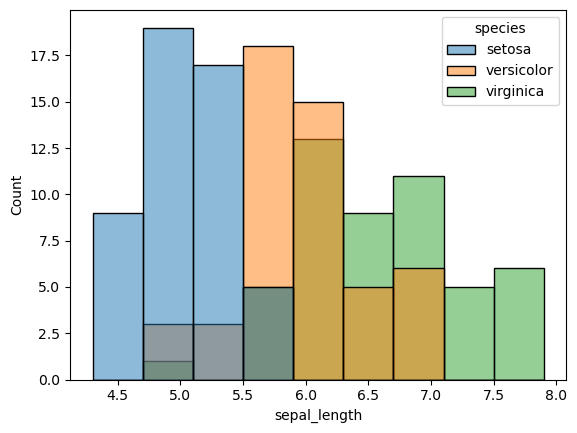

In [31]:
sns.histplot(data=iris, x="sepal_length", hue="species")

<Axes: xlabel='sepal_width', ylabel='Count'>

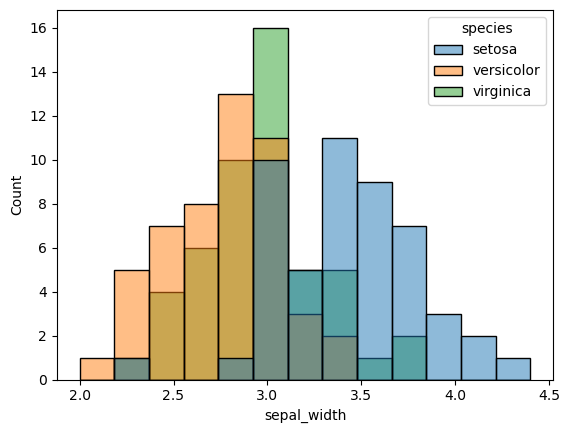

In [32]:
sns.histplot(data=iris, x="sepal_width", hue="species")

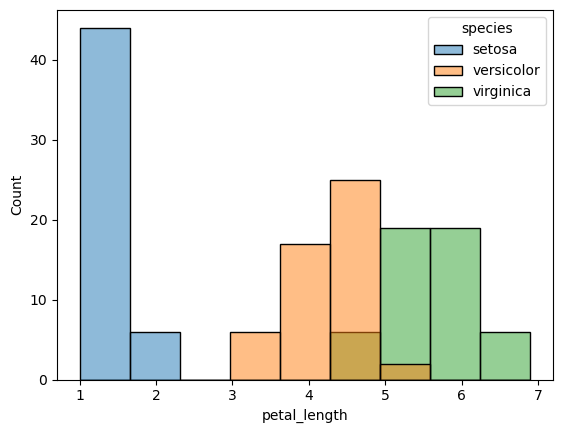

In [33]:
sns.histplot(data=iris, x="petal_length", hue="species");

In [34]:
X = iris.iloc[:, :-1]
y = iris["species"]

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, multi_class="auto")

lr.fit(X, y)

LogisticRegression(max_iter=1000)

In [36]:
lr.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [37]:
lr.score(X, y)

0.9733333333333334

In [38]:
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X)

confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [39]:
lr.coef_

array([[-0.42333655,  0.96718172, -2.51725526, -1.0793699 ],
       [ 0.53430021, -0.3215421 , -0.20640337, -0.94418398],
       [-0.11096366, -0.64563963,  2.72365863,  2.02355388]])

In [40]:
lr.intercept_

array([  9.84952339,   2.23795871, -12.0874821 ])

In [41]:
lr.predict_proba(X).round(2)

array([[0.98, 0.02, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.95, 0.05, 0.  ],
       [0.98, 0.02, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  ],
       [0.95, 0.05, 0.  ],
       [0.95, 0.05, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
 